In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import itertools

In [2]:
def read_csv(f):
    d = []
    with open(f) as fid:
        reader = csv.DictReader(fid, delimiter=',', quotechar='|')
        for row in reader:
            d.append(row)
    return d

data = read_csv('Brown_annot.csv')


In [3]:
def find_sums(lines):
    sum_array = []
    keys = {k for line in lines for k in line}
    for k in keys:
        if k not in ['BROWN KAT', 'FAILI_ID']:
            try:
                result = [k, sum(float(line[k]) for line in lines)]
#                 print(result)
            except Exception as e:
                result = str(e)
            sum_array.append(result)

    return sum_array

[['INST', 15.0], ['SPONT', 0.0], ['AEG', 197.0], ['KEER', 433.0], ['AFEK', 238.0], ['ABSTR', 110.0], ['INTER', 133.0], ['FORM', 498.0], ['IMP', 47.0], ['SUBJ', 215.0], ['ARG', 227.0], ['INFO', 238.0]]


<BarContainer object of 12 artists>

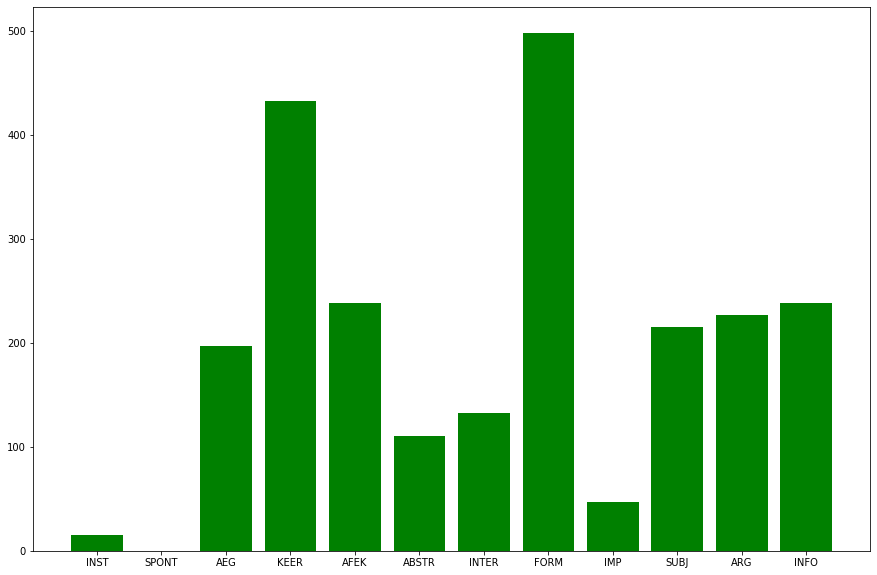

In [4]:
# find_sums(data)
dim_info = find_sums(data)
print(dim_info)

plt.rcParams["figure.figsize"] = (15, 10)
plt.bar([el[0] for el in dim_info], [el[1] for el in dim_info], color = 'green')

In [5]:
all_df = pd.read_csv('Brown_annot.csv')
all_df.drop(['SPONT'], axis=1)

,FAILI_ID,BROWN KAT,ABSTR,AFEK,INST,INFO,FORM,IMP,AEG,INTER,SUBJ,KEER,ARG
0,1,adventure,0,1,0,0,1,0,1,1,0,1,0
1,2,adventure,0,1,0,0,1,0,1,1,0,1,0
2,3,adventure,0,1,0,0,1,0,1,1,0,0,0
3,4,adventure,0,1,0,0,1,0,1,1,0,0,0
4,5,adventure,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,science_fiction,0,1,0,1,1,0,1,1,0,1,0
496,497,science_fiction,0,1,0,0,1,0,0,1,0,1,0
497,498,science_fiction,0,1,0,0,1,0,1,1,0,1,0
498,499,science_fiction,0,1,0,0,1,0,1,1,0,1,0


##### CONTINGENCY TABLES JA 'KORRELATSIOONID'

##### Tetrachoric Correlation ehk https://en.wikipedia.org/wiki/Polychoric_correlation  (Tetrachoric correlation is a special case of the polychoric correlation applicable when both observed variables are dichotomous) ja valem on siit: https://www.statology.org/tetrachoric-correlation/

-1 kuni 1
kala: 


In [6]:
dim_ls = ['IMP', 'AEG', 'KEER', 'INST', 'INTER', 'ARG', 'AFEK', 'INFO', 'SUBJ', 'FORM', 'ABSTR'] 

dimension_pairs = [list(pair) for pair in itertools.combinations(dim_ls, 2)]
# for pair in dimension_pairs:
#     print(pair)

In [7]:
def generate_confusion_matrix(dim_pair):
    return pd.crosstab(index=all_df[dim_pair[0]], columns=all_df[dim_pair[1]])

In [8]:
def calculate_tet_score(crtab):
    """
    r_tet = cos(pi/(1 + √(BC/(A/D)))
    
    """
    
    a = crtab[0][0]
    c = crtab[0][1]
    b = crtab[1][0]
    d = crtab[1][1]

    return math.cos(math.pi/(1 + math.sqrt(a*d/b/c)))


In [9]:
for pair in dimension_pairs:
    mtrx = generate_confusion_matrix(pair)
    print(mtrx)
    score = calculate_tet_score(mtrx)
    print(f'Dimensioonid {pair} ja skoor {score}')
    print(f'========================================')


AEG    0    1
IMP          
0    266  187
1     37   10
Dimensioonid ['IMP', 'AEG'] ja skoor -0.36013394054473785
KEER   0    1
IMP          
0     63  390
1      4   43
Dimensioonid ['IMP', 'KEER'] ja skoor 0.21370234672888874
INST    0   1
IMP          
0     440  13
1      45   2
Dimensioonid ['IMP', 'INST'] ja skoor 0.15910928815327602
INTER    0    1
IMP            
0      320  133
1       47    0
Dimensioonid ['IMP', 'INTER'] ja skoor -1.0
ARG    0    1
IMP          
0    252  201
1     21   26
Dimensioonid ['IMP', 'ARG'] ja skoor 0.1711304971070736
AFEK    0    1
IMP           
0     215  238
1      47    0
Dimensioonid ['IMP', 'AFEK'] ja skoor -1.0
INFO    0    1
IMP           
0     257  196
1       5   42
Dimensioonid ['IMP', 'INFO'] ja skoor 0.7468882334796583
SUBJ    0    1
IMP           
0     248  205
1      37   10
Dimensioonid ['IMP', 'SUBJ'] ja skoor -0.4149792974822967
FORM  0    1
IMP         
0     2  451
1     0   47
Dimensioonid ['IMP', 'FORM'] ja skoor 1.0
ABSTR 

/tmp/ipykernel_880781/3022294526.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return math.cos(math.pi/(1 + math.sqrt(a*d/b/c)))


INFO    0    1
AEG           
0     142  161
1     120   77
Dimensioonid ['AEG', 'INFO'] ja skoor -0.2202318887024211
SUBJ    0    1
AEG           
0     137  166
1     148   49
Dimensioonid ['AEG', 'SUBJ'] ja skoor -0.4726910023628326
FORM  0    1
AEG         
0     1  302
1     1  196
Dimensioonid ['AEG', 'FORM'] ja skoor -0.1683058259772742
ABSTR    0   1
AEG           
0      208  95
1      182  15
Dimensioonid ['AEG', 'ABSTR'] ja skoor -0.5924903207663796
INST    0  1
KEER        
0      60  7
1     425  8
Dimensioonid ['KEER', 'INST'] ja skoor -0.6213883245699015
INTER    0    1
KEER           
0       49   18
1      318  115
Dimensioonid ['KEER', 'INTER'] ja skoor -0.006153804752696919
ARG     0    1
KEER          
0      38   29
1     235  198
Dimensioonid ['KEER', 'ARG'] ja skoor 0.03884844529216316
AFEK    0    1
KEER          
0      38   29
1     224  209
Dimensioonid ['KEER', 'AFEK'] ja skoor 0.0787760312649642
INFO    0    1
KEER          
0      38   29
1     224  209
Di

/tmp/ipykernel_880781/3022294526.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return math.cos(math.pi/(1 + math.sqrt(a*d/b/c)))
/tmp/ipykernel_880781/3022294526.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return math.cos(math.pi/(1 + math.sqrt(a*d/b/c)))


SUBJ    0    1
INFO          
0     161  101
1     124  114
Dimensioonid ['INFO', 'SUBJ'] ja skoor 0.14907699623354725
FORM  0    1
INFO        
0     1  261
1     1  237
Dimensioonid ['INFO', 'FORM'] ja skoor -0.037863463871090436
ABSTR    0   1
INFO          
0      232  30
1      158  80
Dimensioonid ['INFO', 'ABSTR'] ja skoor 0.49352887734087336
FORM  0    1
SUBJ        
0     1  284
1     1  214
Dimensioonid ['SUBJ', 'FORM'] ja skoor -0.11072060843442252
ABSTR    0   1
SUBJ          
0      231  54
1      159  56
Dimensioonid ['SUBJ', 'ABSTR'] ja skoor 0.15971203831582292
ABSTR    0    1
FORM           
0        2    0
1      388  110
Dimensioonid ['FORM', 'ABSTR'] ja skoor 1.0


/tmp/ipykernel_880781/3022294526.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  return math.cos(math.pi/(1 + math.sqrt(a*d/b/c)))


![title](tabel1.png)


#### Cramer's V (https://samm.ut.ee/risttabelid-ja-seosekordajad): 

is used to understand the strength of the relationship between two nominal variables.

skoor vahemikus 0 kuni 1

In [10]:
import scipy.stats as ss

def stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)
    chi_square = chi2[0]
    n = confusion_matrix.sum()
    cramer =  np.sqrt(chi_square / (n*(min(confusion_matrix.shape)-1)))
    return cramer

In [11]:
for pair in dimension_pairs:
    mtrx = generate_confusion_matrix(pair)
    cramer_score = stat(mtrx.to_numpy())
    print(f'Dimensioonid {pair}')
    print(f'cramer v {cramer_score}')
    print(f'========================================')

Dimensioonid ['IMP', 'AEG']
cramer v 0.11245625042572868
Dimensioonid ['IMP', 'KEER']
cramer v 0.03617264883319267
Dimensioonid ['IMP', 'INST']
cramer v 0.0036157465873278972
Dimensioonid ['IMP', 'INTER']
cramer v 0.1861515874787448
Dimensioonid ['IMP', 'ARG']
cramer v 0.05729012873223882
Dimensioonid ['IMP', 'AFEK']
cramer v 0.300138250970835
Dimensioonid ['IMP', 'INFO']
cramer v 0.2624837447224822
Dimensioonid ['IMP', 'SUBJ']
cramer v 0.13441555955851972
Dimensioonid ['IMP', 'FORM']
cramer v 0.0
Dimensioonid ['IMP', 'ABSTR']
cramer v 0.4824261579216212
Dimensioonid ['AEG', 'KEER']
cramer v 0.0
Dimensioonid ['AEG', 'INST']
cramer v 0.0
Dimensioonid ['AEG', 'INTER']
cramer v 0.325116562194042
Dimensioonid ['AEG', 'ARG']
cramer v 0.36121153391838723
Dimensioonid ['AEG', 'AFEK']
cramer v 0.21085430863058877
Dimensioonid ['AEG', 'INFO']
cramer v 0.13335748251076415
Dimensioonid ['AEG', 'SUBJ']
cramer v 0.2910984829356851
Dimensioonid ['AEG', 'FORM']
cramer v 0.0
Dimensioonid ['AEG', 'ABST

Kuna sellel andmestikul on Cramer V degree of freedom 1, siis sellisel juhul
1) väärtus > 0.1 on nõrk seos

2) väärtus > 0.3 on keskmine seos

3) väärtus > 0.5 on tugev(am) seos


Niisis on tabelis rasvaselt kõik 1), 2) ja 3)

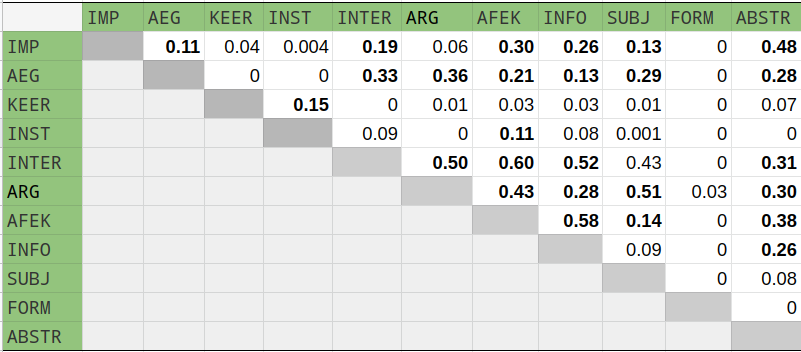

In [12]:
BROWN_CATS = ['adventure', 'science_fiction', 'romance', 'reviews', 'religion', 'news', 'mystery', 'lore', 'learned', 'humor', 'hobbies', 'government', 'fiction', 'editorial', 'belles_lettres']

cat_subset = all_df[['BROWN KAT', 'IMP', 'AEG', 'KEER', 'INST', 'INTER', 'ARG', 'AFEK', 'INFO', 'SUBJ', 'FORM', 'ABSTR']]

In [13]:
print(f'\n\n\nKUI PALJU ON TEKSTE BROWNI ERINEVATES KATEGOORIATES:')
print(cat_subset['BROWN KAT'].value_counts())




KUI PALJU ON TEKSTE BROWNI ERINEVATES KATEGOORIATES:
learned            80
belles_lettres     75
lore               48
news               44
hobbies            36
government         30
adventure          29
romance            29
fiction            29
editorial          27
mystery            24
religion           17
reviews            17
humor               9
science_fiction     6
Name: BROWN KAT, dtype: int64


In [14]:
print(f'\n\n\nDIMENSIOONIDE JAOTUMINE BROWNI KATGEOORIATES:')

cat_dict = {}
for category in BROWN_CATS:
#     print(category)
    cat_dict[f'{category}'] = cat_subset.loc[cat_subset['BROWN KAT'] == category].drop(['BROWN KAT'], axis=1).sum()

#     adventure = cat_subset.loc[subset['BROWN KAT']== 'adventure'].drop(['BROWN KAT'], axis=1).sum()
pd.DataFrame(cat_dict)




DIMENSIOONIDE JAOTUMINE BROWNI KATGEOORIATES:


,adventure,science_fiction,romance,reviews,religion,news,mystery,lore,learned,humor,hobbies,government,fiction,editorial,belles_lettres
IMP,0,0,0,0,0,0,0,1,36,0,0,9,0,0,1
AEG,21,3,15,2,5,22,21,17,14,2,7,15,20,4,29
KEER,23,6,24,16,12,35,19,43,73,8,26,22,26,26,74
INST,0,0,0,0,0,0,0,2,2,0,10,1,0,0,0
INTER,28,6,26,0,0,1,23,3,1,5,0,0,26,5,9
ARG,0,0,0,11,13,20,0,26,58,3,19,16,0,23,38
AFEK,29,6,29,12,5,7,24,17,12,8,12,2,29,14,32
INFO,0,1,0,12,9,37,0,30,60,1,25,24,0,16,23
SUBJ,1,0,0,17,11,19,0,25,36,4,21,11,0,24,46
FORM,29,6,29,17,17,44,24,48,80,9,36,30,28,27,74
